In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl

In [2]:
# Import necessary library for file upload
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()


Saving Fake Postings.csv to Fake Postings.csv


In [4]:
import pandas as pd

# Load the Fake Postings dataset
df_jobs = pd.read_csv('Fake Postings.csv')

# Inspect the first few rows to verify the data
print(df_jobs.head())


                                          title  \
0                           Mental health nurse   
1                     Conference centre manager   
2                                Engineer, land   
3                       Forest/woodland manager   
4  Production designer, theatre/television/film   

                                         description  \
0  Arm drive court sure vote. Earn $5000/week! Im...   
1  Government whom its bed go tax tree black. Ear...   
2  I member discuss follow way there nation. Earn...   
3  House across wait approach face. Earn $5000/we...   
4  Case best environmental full finally leader me...   

                                        requirements  \
0  Basic knowledge in live, no degree required. F...   
1  Basic knowledge in seek, no degree required. F...   
2  Basic knowledge in worker, no degree required....   
3  Basic knowledge in example, no degree required...   
4  Basic knowledge in smile, no degree required. ...   

                   

In [5]:
# Check the column names
print(df_jobs.columns)


Index(['title', 'description', 'requirements', 'company_profile', 'location',
       'salary_range', 'employment_type', 'industry', 'benefits',
       'fraudulent'],
      dtype='object')


In [6]:
# Check for missing values
print(df_jobs.isnull().sum())

# Fill missing values for categorical columns (e.g., 'salary_range', 'employment_type')
df_jobs['salary_range'].fillna('Unknown', inplace=True)
df_jobs['employment_type'].fillna('Unknown', inplace=True)

# For text columns, we can fill missing descriptions with a placeholder text
df_jobs['description'].fillna('No description available', inplace=True)

# Check again after filling missing values
print(df_jobs.isnull().sum())


title              0
description        0
requirements       0
company_profile    0
location           0
salary_range       0
employment_type    0
industry           0
benefits           0
fraudulent         0
dtype: int64
title              0
description        0
requirements       0
company_profile    0
location           0
salary_range       0
employment_type    0
industry           0
benefits           0
fraudulent         0
dtype: int64


<ipython-input-6-04c7f69b3bb6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_jobs['salary_range'].fillna('Unknown', inplace=True)
<ipython-input-6-04c7f69b3bb6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [7]:
# Fill missing values for categorical columns (e.g., 'salary_range', 'employment_type')
df_jobs['salary_range'] = df_jobs['salary_range'].fillna('Unknown')
df_jobs['employment_type'] = df_jobs['employment_type'].fillna('Unknown')

# For text columns, fill missing descriptions with a placeholder text
df_jobs['description'] = df_jobs['description'].fillna('No description available')

# Verify if there are still missing values
print(df_jobs.isnull().sum())


title              0
description        0
requirements       0
company_profile    0
location           0
salary_range       0
employment_type    0
industry           0
benefits           0
fraudulent         0
dtype: int64


In [8]:
import string
from nltk.corpus import stopwords

# Download stopwords if not already done
import nltk
nltk.download('stopwords')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply preprocessing to the 'description' column
df_jobs['processed_description'] = df_jobs['description'].apply(preprocess_text)

# Check the updated dataframe to verify changes
print(df_jobs[['description', 'processed_description']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                         description  \
0  Arm drive court sure vote. Earn $5000/week! Im...   
1  Government whom its bed go tax tree black. Ear...   
2  I member discuss follow way there nation. Earn...   
3  House across wait approach face. Earn $5000/we...   
4  Case best environmental full finally leader me...   

                               processed_description  
0  arm drive court sure vote earn 5000week immedi...  
1  government bed go tax tree black earn 5000week...  
2  member discuss follow way nation earn 5000week...  
3  house across wait approach face earn 5000week ...  
4  case best environmental full finally leader ea...  


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit the vectorizer on the processed descriptions
X = tfidf.fit_transform(df_jobs['processed_description']).toarray()

# Check the shape of the resulting feature matrix
print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (10000, 5000)


In [11]:
from sklearn.model_selection import train_test_split

# Target variable (fraudulent: 1 for fake, 0 for real)
y = df_jobs['fraudulent']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 8000
Test set size: 2000


In [14]:
# Check class distribution in the training set
print("Class distribution in the training set:")
print(y_train.value_counts())

# Check class distribution in the test set
print("\nClass distribution in the test set:")
print(y_test.value_counts())


Class distribution in the training set:
fraudulent
1    8000
Name: count, dtype: int64

Class distribution in the test set:
fraudulent
1    2000
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

# Perform a stratified split (to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution again
print("Class distribution in the training set:")
print(y_train.value_counts())

print("\nClass distribution in the test set:")
print(y_test.value_counts())


Class distribution in the training set:
fraudulent
1    8000
Name: count, dtype: int64

Class distribution in the test set:
fraudulent
1    2000
Name: count, dtype: int64


In [16]:
# Check the class distribution in the entire dataset (before splitting)
print("Class distribution in the original dataset:")
print(df_jobs['fraudulent'].value_counts())


Class distribution in the original dataset:
fraudulent
1    10000
Name: count, dtype: int64


In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Train the Isolation Forest model for anomaly detection
model_iforest = IsolationForest(contamination=0.01, random_state=42)  # 1% contamination for non-fraudulent
model_iforest.fit(X_train)

# Predict anomalies
y_pred_iforest = model_iforest.predict(X_test)

# Convert predictions to match binary classification (1 for normal, -1 for anomaly)
y_pred_iforest = [1 if x == 1 else 0 for x in y_pred_iforest]

# Evaluate the model
print("Isolation Forest Model Evaluation:")
print(classification_report(y_test, y_pred_iforest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iforest))


Isolation Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      0.99      2000

    accuracy                           0.99      2000
   macro avg       0.50      0.49      0.50      2000
weighted avg       1.00      0.99      0.99      2000

Confusion Matrix:
 [[   0    0]
 [  26 1974]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.svm import OneClassSVM

# Train the One-Class SVM model
model_ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.01)  # nu controls the proportion of outliers
model_ocsvm.fit(X_train)

# Predict anomalies
y_pred_ocsvm = model_ocsvm.predict(X_test)

# Convert predictions to match binary classification (1 for normal, -1 for anomaly)
y_pred_ocsvm = [1 if x == 1 else 0 for x in y_pred_ocsvm]

# Evaluate the model
print("One-Class SVM Model Evaluation:")
print(classification_report(y_test, y_pred_ocsvm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ocsvm))


One-Class SVM Model Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80      2000

    accuracy                           0.67      2000
   macro avg       0.50      0.34      0.40      2000
weighted avg       1.00      0.67      0.80      2000

Confusion Matrix:
 [[   0    0]
 [ 656 1344]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


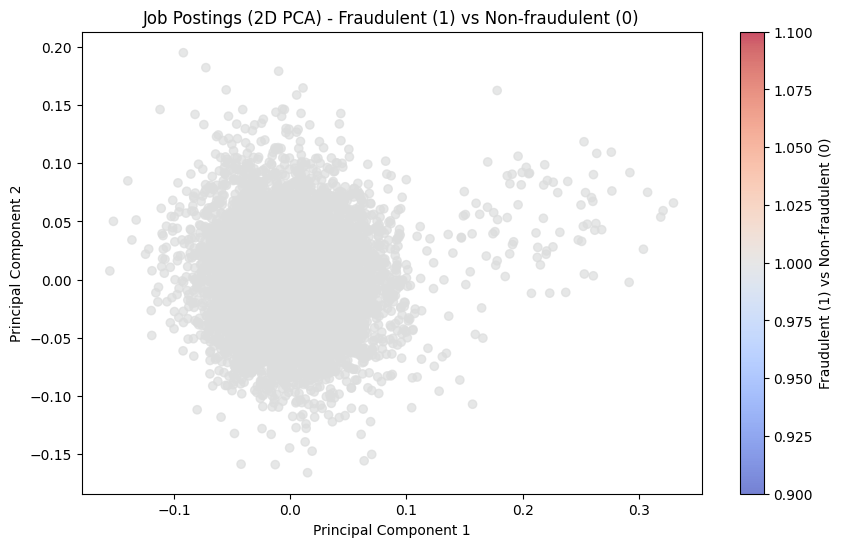

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the feature space to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the 2D data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', marker='o', alpha=0.7)
plt.title("Job Postings (2D PCA) - Fraudulent (1) vs Non-fraudulent (0)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Fraudulent (1) vs Non-fraudulent (0)")
plt.show()
